# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

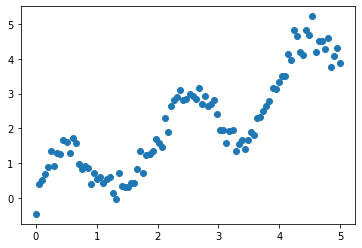

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5352178510392307


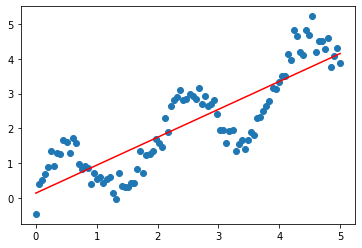

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [11]:
print(x.shape)

(100,)


In [8]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [9]:
regr_poly = LinearRegression()

In [10]:
regr_poly.fit(X_poly, y)

LinearRegression()

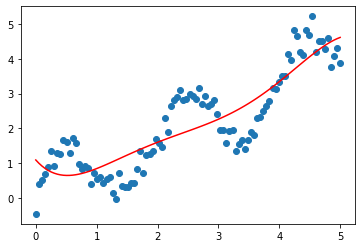

In [11]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [12]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.98223918  2.75901372 -1.26609982  0.26184476 -0.01949885]
interception:  1.0929506751849196


In [13]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.09295068, 0.99971376, 0.91959702, 0.8516822 , 0.79509036,
       0.74898118, 0.71255212, 0.6850377 , 0.66570871, 0.65387145,
       0.64886694, 0.6500702 , 0.65688942, 0.66876523, 0.68516992,
       0.70560667, 0.7296088 , 0.75673895, 0.78658839, 0.81877617,
       0.85294841, 0.88877749, 0.92596132, 0.96422253, 1.00330774,
       1.04298678, 1.08305188, 1.12331697, 1.16361686, 1.20380649,
       1.24376017, 1.28337078, 1.32254904, 1.36122271, 1.39933584,
       1.43684799, 1.47373347, 1.50998056, 1.54559076, 1.58057799,
       1.61496786, 1.64879687, 1.68211166, 1.71496821, 1.74743114,
       1.77957284, 1.8114728 , 1.84321678, 1.87489606, 1.90660667,
       1.93844863, 1.97052516, 2.00294192, 2.03580626, 2.06922644,
       2.10331082, 2.13816717, 2.17390184, 2.210619  , 2.24841991,
       2.28740209, 2.3276586 , 2.36927726, 2.41233987, 2.45692143,
       2.50308941, 2.55090296, 2.60041212, 2.65165709, 2.70466743,
       2.75946131, 2.81604473, 2.87441076, 2.93453877, 2.99639

In [14]:
regr_poly.predict(X_poly)

array([1.09295068, 0.99971376, 0.91959702, 0.8516822 , 0.79509036,
       0.74898118, 0.71255212, 0.6850377 , 0.66570871, 0.65387145,
       0.64886694, 0.6500702 , 0.65688942, 0.66876523, 0.68516992,
       0.70560667, 0.7296088 , 0.75673895, 0.78658839, 0.81877617,
       0.85294841, 0.88877749, 0.92596132, 0.96422253, 1.00330774,
       1.04298678, 1.08305188, 1.12331697, 1.16361686, 1.20380649,
       1.24376017, 1.28337078, 1.32254904, 1.36122271, 1.39933584,
       1.43684799, 1.47373347, 1.50998056, 1.54559076, 1.58057799,
       1.61496786, 1.64879687, 1.68211166, 1.71496821, 1.74743114,
       1.77957284, 1.8114728 , 1.84321678, 1.87489606, 1.90660667,
       1.93844863, 1.97052516, 2.00294192, 2.03580626, 2.06922644,
       2.10331082, 2.13816717, 2.17390184, 2.210619  , 2.24841991,
       2.28740209, 2.3276586 , 2.36927726, 2.41233987, 2.45692143,
       2.50308941, 2.55090296, 2.60041212, 2.65165709, 2.70466743,
       2.75946131, 2.81604473, 2.87441076, 2.93453877, 2.99639

In [17]:
Y=regr_poly.predict(X_poly)
MSE=np.sum((Y-y)**2)/len(y)
MSE

0.460580405973809

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [18]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [19]:
sigma = 0.3

In [29]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])
X_rbf.shape

(100, 5)

In [25]:
regr_rbf = LinearRegression()

In [30]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

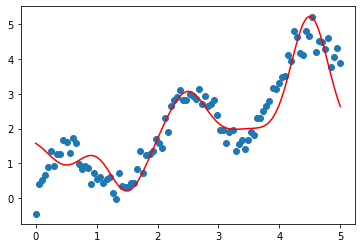

In [31]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [32]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.82507164 -1.58062722  1.29808362  0.2022789   3.45592669]
interception:  1.7815422705118409


#### Comparison

In [33]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

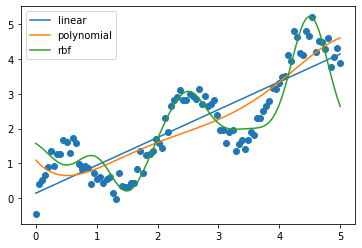

In [34]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [35]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5352178510392307


In [36]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.460580405973809


In [37]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2672128650793601
